# 3章 顧客の全体像を把握する１０本ノック

ここでは、スポーツジムの会員データを使って顧客の行動を分析していきます。  
これまでと同様にまずはデータを理解し、加工した後、  
顧客の行動データを分析していきましょう。  
ここでは、機械学習に向けての初期分析を行います。

### ノック21：データを読み込んで把握しよう

In [4]:
!ls

'3章 顧客の全体像を把握する１０本ノック_answer.ipynb'   class_master.csv
'3章 顧客の全体像を把握する１０本ノック.ipynb'	        customer_master.csv
 campaign_master.csv				        use_log.csv


In [266]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [6]:
import pandas as pd
df_use_log = pd.read_csv("use_log.csv")
df_class_master = pd.read_csv("class_master.csv")
df_campaign_master = pd.read_csv("campaign_master.csv")
df_customer_master = pd.read_csv("customer_master.csv")



In [9]:
df_use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [16]:
df_class_master.head()



,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [17]:
df_campaign_master.head()

,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [18]:
df_customer_master.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


### ノック22：顧客データを整形しよう

In [21]:
# df_customer にクラスとキャンペーン情報をジョイン
df_22 = df_customer_master.copy()
df_22 = df_22.merge(df_class_master, on = "class", how="left")
df_22 = df_22.merge(df_campaign_master, on = "campaign_id", how="left")
df_22.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [24]:
df_22.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

### ノック23：顧客データの基礎集計をしよう

In [27]:
df_23 = df_22.copy()

# 会員区分
df_23.groupby("class_name")["customer_id"].count()

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [29]:
# キャンペーン区分
df_23.groupby("campaign_id")["customer_id"].count()

campaign_id
CA1    3050
CA2     650
CA3     492
Name: customer_id, dtype: int64

In [31]:
# 性別
df_23.groupby("gender")["customer_id"].count()

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [32]:
# 退会しているかどうか
df_23.groupby("is_deleted")["customer_id"].count()

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

### ノック24：最新顧客データの基礎集計をしよう

In [38]:
# 最新顧客データ
# 最新顧客とは、
df_24 = df_23.copy()
df_24["start_date"] = pd.to_datetime(df_24["start_date"])
df_24["end_date"] = pd.to_datetime(df_24["end_date"])
df_24.sort_values(by="start_date")

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
33,HD792156,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
34,OA478509,XXXX,C02,M,2015-05-01,NaT,CA1,0,デイタイム,7500,通常
35,HI388582,XX,C02,F,2015-05-01,NaT,CA1,0,デイタイム,7500,通常
36,TS210661,XXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
...,...,...,...,...,...,...,...,...,...,...,...
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常


In [57]:
# 最新月のユーザのみに絞り込む
# ↑どういう意味よ？
# [最新月のユーザ]とは？：2019年3月時点で在籍しているユーザのこと
# 2019年3月末で退会したユーザは、最新月のユーザに含まれる。
# つまり、"end_date"が、NATもしくは、2019年3月のユーザ

df_24 = df_24[(df_24["end_date"].isnull()) | (df_24["end_date"] > "2019-2-28")]
df_24

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常


In [58]:
df_24.groupby("class_name")["customer_id"].count()

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [60]:
df_24.groupby("campaign_name")["customer_id"].count()

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [62]:
df_24.groupby("gender")["customer_id"].count()

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [64]:
# ↑のままじゃわかりにくかろ？と思って並べる
pd.DataFrame({"all":df_23.groupby("class_name")["customer_id"].count(),
              "latest": df_24.groupby("class_name")["customer_id"].count()})

,all,latest
class_name,,
オールタイム,2045,1444
デイタイム,1019,696
ナイト,1128,813


In [66]:
pd.DataFrame({"all":df_23.groupby("campaign_name")["customer_id"].count(),
              "latest": df_24.groupby("campaign_name")["customer_id"].count()})

,all,latest
campaign_name,,
入会費半額,650,311
入会費無料,492,242
通常,3050,2400


In [67]:
pd.DataFrame({"all":df_23.groupby("gender")["customer_id"].count(),
              "latest": df_24.groupby("gender")["customer_id"].count()})

,all,latest
gender,,
F,1983,1400
M,2209,1553


### ノック25：利用履歴データを集計しよう

In [81]:
df_25 = df_use_log.copy()
# 顧客ごとの毎月の利用回数
df_25["usedate"] = pd.to_datetime(df_25["usedate"])
df_25.set_index("usedate").groupby("customer_id")["log_id"].resample("M").count()

customer_id  usedate   
AS002855     2018-04-30    4
             2018-05-31    5
             2018-06-30    5
             2018-07-31    5
             2018-08-31    3
                          ..
TS999855     2018-11-30    4
             2018-12-31    5
             2019-01-31    7
             2019-02-28    4
             2019-03-31    4
Name: log_id, Length: 36842, dtype: int64

In [144]:
# ちょっとくるくる回しすぎかな。
df_25["bymonth"] = df_25["usedate"].dt.strftime("%Y%m")
df_userlog_customer = df_25.groupby(["customer_id", "bymonth"])["log_id"].count().unstack().T.describe().T[["mean","50%", "max", "min"]]
df_userlog_customer.head()

,mean,50%,max,min
customer_id,,,,
AS002855,4.500000,5.0,7.0,2.0
AS008805,4.000000,4.0,8.0,1.0
AS009013,2.000000,2.0,2.0,2.0
AS009373,5.083333,5.0,7.0,3.0
AS015233,7.545455,7.0,11.0,4.0


### ノック26：利用履歴データから定期利用フラグを作成しよう

In [245]:
# 定期的にジムを利用しているユーザの特定
# 定期的とは：
# 顧客ごとに月別/曜日別に集計して最大値が４以上の曜日が一回でもあった場合は定期的に来たユーザとする
# (これは実際とはかけ離れている気がするよ)
df_26 = df_use_log.copy()
df_26["usedate"] = pd.to_datetime(df_26["usedate"])
df_26["day of week"] = df_26["usedate"].dt.dayofweek
df_26["by month"] = df_26["usedate"].dt.strftime("%Y%m")

# ユーザ、曜日、月ごとにカウントして、
# データが無いところはDrop
# それをUnstackして月をカラムにし直しMaxを取る。
uselog_weekday = df_26.groupby(["customer_id", "day of week","by month"])["log_id"].count().dropna().unstack().max(axis=1, skipna=True) >= 4
uselog_weekday = uselog_weekday.rename("regulary user")
uselog_weekday = uselog_weekday[uselog_weekday].reset_index().drop_duplicates(subset="customer_id",)
uselog_weekday

# max は定期的に来ている客の特定としてはまずいと思う。せめてMeanじゃないの？
# uselog_weekday = df_26.groupby(["customer_id", "day of week","by month"])["log_id"].count().dropna().unstack().mean(axis=1, skipna=True) >= 4

,customer_id,day of week,regulary user
0,AS002855,5,True
1,AS008805,5,True
2,AS009373,6,True
3,AS015233,5,True
5,AS015315,6,True
...,...,...,...
4587,TS995853,6,True
4588,TS998593,4,True
4590,TS999079,6,True
4591,TS999231,1,True


### ノック27：顧客データと利用履歴データを結合しよう

In [ ]:
# df_22 (顧客データ) に、df_userlog_customer と uselog_weekday をジョインする

In [248]:
df_customer_join = df_22.copy()
df_27 = df_customer_join.merge(df_userlog_customer, on="customer_id", how="left")
df_27 = df_27.merge(uselog_weekday, on="customer_id", how="left")
df_27["regulary user"] = df_27["regulary user"].fillna(False)

# len(df_27[df_27["regulary user"]])
# 3413

### ノック28：会員期間を計算しよう

In [249]:
df_28 = df_27.copy()
df_28[["start_date", "end_date"]] = df_28[["start_date", "end_date"]].applymap(pd.to_datetime)
df_28["end_date"].fillna(pd.to_datetime("2019-4-30"), inplace=True)
df_28["membership_period"] = (df_28["end_date"] - df_28["start_date"]).apply(lambda d:d.days)
df_28


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,50%,max,min,day of week,regulary user,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,4.833333,5.0,8.0,2.0,3.0,True,1460
1,PL270116,XXXXX,C01,M,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,5.083333,5.0,7.0,3.0,2.0,True,1460
2,OA974876,XXXXX,C01,M,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,4.583333,5.0,6.0,3.0,4.0,True,1460
3,HD024127,XXXXX,C01,F,2015-05-01,2019-04-30,CA1,0,オールタイム,10500,通常,4.833333,4.5,7.0,2.0,3.0,True,1460
4,HD661448,XXXXX,C03,F,2015-05-01,2019-04-30,CA1,0,ナイト,6000,通常,3.916667,4.0,6.0,1.0,2.0,True,1460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,2019-04-30,CA1,0,オールタイム,10500,通常,8.000000,8.0,8.0,8.0,NaN,False,47
4188,HD246549,XXXXX,C01,F,2019-03-14,2019-04-30,CA1,0,オールタイム,10500,通常,10.000000,10.0,10.0,10.0,NaN,False,47
4189,GD037007,XXXXX,C03,M,2019-03-14,2019-04-30,CA1,0,ナイト,6000,通常,8.000000,8.0,8.0,8.0,NaN,False,47
4190,OA953150,XXXXX,C01,M,2019-03-14,2019-04-30,CA1,0,オールタイム,10500,通常,11.000000,11.0,11.0,11.0,NaN,False,47


### ノック29：顧客行動の各種統計量を把握しよう

In [250]:
# 顧客の利用回数の統計調査
df_29 = df_28.copy()
df_29[["mean","50%","max","min"]].describe()

,mean,50%,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [251]:
df_29.groupby("regulary user")[["mean","50%","max","min"]].describe().T

regulary user       False        True 
mean count     779.000000  3413.000000
     mean        3.827324     5.676819
     std         1.869829     1.564592
     min         1.000000     2.000000
     25%         2.500000     4.555556
     50%         3.666667     5.250000
     75%         4.666667     6.750000
     max        12.000000    12.000000
50%  count     779.000000  3413.000000
     mean        3.578306     5.632288
     std         1.893611     1.647987
     min         1.000000     2.000000
     25%         2.000000     4.500000
     50%         3.000000     5.000000
     75%         4.500000     7.000000
     max        12.000000    12.000000
max  count     779.000000  3413.000000
     mean        5.827985     8.279519
     std         2.860274     1.672071
     min         1.000000     4.000000
     25%         3.000000     7.000000
     50%         6.000000     8.000000
     75%         8.000000     9.000000
     max        13.000000    14.000000
min  count     779.000000  3413.000000
     mean        2.255456     3.220627
     std         1.893082     1.920372
     min         1.000000     1.000000
     25%         1.000000     2.000000
     50%         2.000000     3.000000
     75%         3.000000     4.000000
     max        12.000000    12.000000

<AxesSubplot:ylabel='Frequency'>

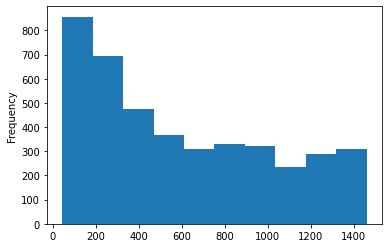

In [254]:
# 会員期間の分布
df_29["membership_period"].plot.hist(bins=10)

### ノック30：退会ユーザーと継続ユーザーの違いを把握しよう

In [258]:
df_30 = df_29.copy()
df_30["is_deleted"].value_counts()

0    2842
1    1350
Name: is_deleted, dtype: int64

In [264]:
# 退会ユーザ
df_30[df_30["is_deleted"]==1][['price', 'mean', '50%', 'max', 'min','regulary user', 'membership_period']].describe()

,price,mean,50%,max,min,membership_period
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,8595.555556,3.865474,3.621852,6.461481,1.821481,270.234815
std,1949.163652,1.246385,1.270847,2.584021,0.976361,155.096341
min,6000.000000,1.000000,1.000000,1.000000,1.000000,44.000000
25%,6000.000000,3.000000,3.000000,4.000000,1.000000,150.000000
50%,7500.000000,4.000000,4.000000,7.000000,2.000000,242.000000
75%,10500.000000,4.666667,4.500000,8.000000,2.000000,364.000000
max,10500.000000,9.000000,9.000000,13.000000,8.000000,729.000000


In [267]:
# 継続ユーザ
df_30[df_30["is_deleted"]!=1][['price', 'mean', '50%', 'max', 'min','regulary user', 'membership_period']].describe()

,price,mean,50%,max,min,membership_period
count,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,8542.927516,6.030288,6.024279,8.471147,3.620690,756.053835
std,1977.189779,1.553587,1.599765,1.571048,2.030488,420.864717
min,6000.000000,3.166667,3.000000,5.000000,1.000000,46.000000
25%,6000.000000,4.833333,5.000000,7.000000,2.000000,390.000000
50%,7500.000000,5.583333,5.500000,8.000000,3.000000,759.000000
75%,10500.000000,7.178030,7.000000,10.000000,5.000000,1094.000000
max,10500.000000,12.000000,12.000000,14.000000,12.000000,1460.000000


<AxesSubplot:title={'center':'mean by month'}, ylabel='Frequency'>

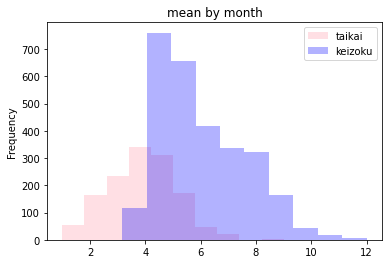

In [281]:
df_30[df_30["is_deleted"]==1]["mean"].plot.hist(alpha=0.5, color="pink", label="taikai", legend=True, title="mean by month")
df_30[df_30["is_deleted"]!=1]["mean"].plot.hist(alpha=0.3, color="blue", label="keizoku", legend=True)

<AxesSubplot:title={'center':'max by month'}, ylabel='Frequency'>

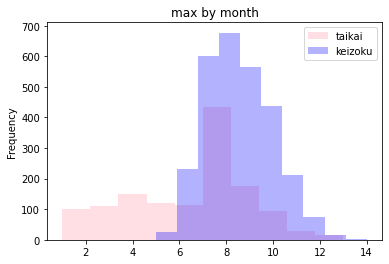

In [282]:
df_30[df_30["is_deleted"]==1]["max"].plot.hist(alpha=0.5, color="pink", label="taikai", legend=True, title="max by month")
df_30[df_30["is_deleted"]!=1]["max"].plot.hist(alpha=0.3, color="blue", label="keizoku", legend=True)